- https://github.com/LambdaLabsML/examples/tree/main/stable-diffusion-finetuning

- 직접 파인튜닝하는 코드가 코랩 16GB 수준 GPU에서 OOM나서 accelerate 스크립트로는 괜찮은지 실험해봄

- 결론은 역시나 Out of Memory

## Setup

### Pytorch

In [1]:
!pip uninstall -y torch torchvision torchaudio torchtext

Found existing installation: torch 2.1.0+cu121
Uninstalling torch-2.1.0+cu121:
  Successfully uninstalled torch-2.1.0+cu121
Found existing installation: torchvision 0.16.0+cu121
Uninstalling torchvision-0.16.0+cu121:
  Successfully uninstalled torchvision-0.16.0+cu121
Found existing installation: torchaudio 2.1.0+cu121
Uninstalling torchaudio-2.1.0+cu121:
  Successfully uninstalled torchaudio-2.1.0+cu121
Found existing installation: torchtext 0.16.0
Uninstalling torchtext-0.16.0:
  Successfully uninstalled torchtext-0.16.0


In [2]:
!pip install torch==2.0.0 torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

### Transformers

In [3]:
!pip uninstall -y transformers

Found existing installation: transformers 4.37.2
Uninstalling transformers-4.37.2:
  Successfully uninstalled transformers-4.37.2


In [4]:
!git clone https://github.com/huggingface/transformers.git

Cloning into 'transformers'...
remote: Enumerating objects: 186266, done.
remote: Counting objects: 100% (18699/18699), done.
remote: Compressing objects: 100% (2251/2251), done.
remote: Total 186266 (delta 17877), reused 16597 (delta 16400), pack-reused 167567
Receiving objects: 100% (186266/186266), 191.73 MiB | 20.53 MiB/s, done.
Resolving deltas: 100% (132934/132934), done.


In [5]:
%cd transformers

/content/transformers


In [6]:
!pip install .

Processing /content/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.39.0.dev0-py3-none-any.whl size=8551653 sha256=96a13e34d8f5262fcaf950c50940cc5da6a0b976c65240dcb289a35c1dbe194a
  Stored in directory: /tmp/pip-ephem-wheel-cache-rm1l8lvv/wheels/7c/35/80/e946b22a081210c6642e607ed65b2a5b9a4d9259695ee2caf5
Successfully built transformers


In [7]:
%cd ..

/content


### Accelerate

In [8]:
!git clone https://github.com/huggingface/accelerate.git

Cloning into 'accelerate'...
remote: Enumerating objects: 11235, done.
remote: Counting objects: 100% (3138/3138), done.
remote: Compressing objects: 100% (506/506), done.
remote: Total 11235 (delta 2852), reused 2747 (delta 2599), pack-reused 8097
Receiving objects: 100% (11235/11235), 3.66 MiB | 21.65 MiB/s, done.
Resolving deltas: 100% (7672/7672), done.


In [9]:
%cd accelerate

/content/accelerate


In [10]:
!pip install .

Processing /content/accelerate
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-0.28.0.dev0-py3-none-any.whl size=282549 sha256=e0684b8df5e68f23be5eed7c9e2b7bfc360deafc57da8f9c83d0ee56633069d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-k6uzmlb1/wheels/ee/de/36/3577a68ea4d2f2740f07ac2f64a21d1297f375cdabfd35ed9f
Successfully built accelerate


In [11]:
%cd ..

/content


### Diffusers

In [12]:
!git clone https://github.com/huggingface/diffusers.git

Cloning into 'diffusers'...
remote: Enumerating objects: 54984, done.
remote: Counting objects: 100% (13589/13589), done.
remote: Compressing objects: 100% (1249/1249), done.
remote: Total 54984 (delta 13088), reused 12387 (delta 12326), pack-reused 41395
Receiving objects: 100% (54984/54984), 36.59 MiB | 23.67 MiB/s, done.
Resolving deltas: 100% (40185/40185), done.


In [13]:
%cd diffusers

/content/diffusers


In [14]:
!pip install .

Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.27.0.dev0-py3-none-any.whl size=1950356 sha256=34d37f9f02f7707bd039554dd804e486c0cfa183fc87bdf45826e3e46f0f5a84
  Stored in directory: /tmp/pip-ephem-wheel-cache-q89f86ku/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers


In [15]:
%cd ..

/content


### Peft

In [16]:
!git clone https://github.com/huggingface/peft.git

Cloning into 'peft'...
remote: Enumerating objects: 6707, done.
remote: Counting objects: 100% (555/555), done.
remote: Compressing objects: 100% (320/320), done.
remote: Total 6707 (delta 303), reused 397 (delta 204), pack-reused 6152
Receiving objects: 100% (6707/6707), 10.56 MiB | 25.87 MiB/s, done.
Resolving deltas: 100% (4360/4360), done.


In [17]:
%cd peft

/content/peft


In [18]:
!pip install .

Processing /content/peft
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peft: filename=peft-0.8.2-py3-none-any.whl size=187965 sha256=49cffda795efd900cac9a530013324cf775adfdc1744a5965173efc01acdbbe5
  Stored in directory: /tmp/pip-ephem-wheel-cache-4priz3b2/wheels/68/34/9a/bc89c388f31240a90cfdc593223a377c7ee9f751442bd51b9e
Successfully built peft


In [19]:
%cd ..

/content


### Datasets

In [20]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00


In [21]:
import torch, transformers, datasets, diffusers, accelerate, peft
torch.__version__, transformers.__version__, datasets.__version__, diffusers.__version__, accelerate.__version__, peft.__version__

('2.0.0+cu117', '4.39.0.dev0', '2.17.1', '0.27.0.dev0', '0.28.0.dev0', '0.8.2')

In [22]:
!cp diffusers/examples/text_to_image/train_text_to_image.py .

## 실행

In [23]:
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [24]:
# # https://huggingface.co/docs/transformers/model_sharing
# from huggingface_hub import notebook_login

# notebook_login()

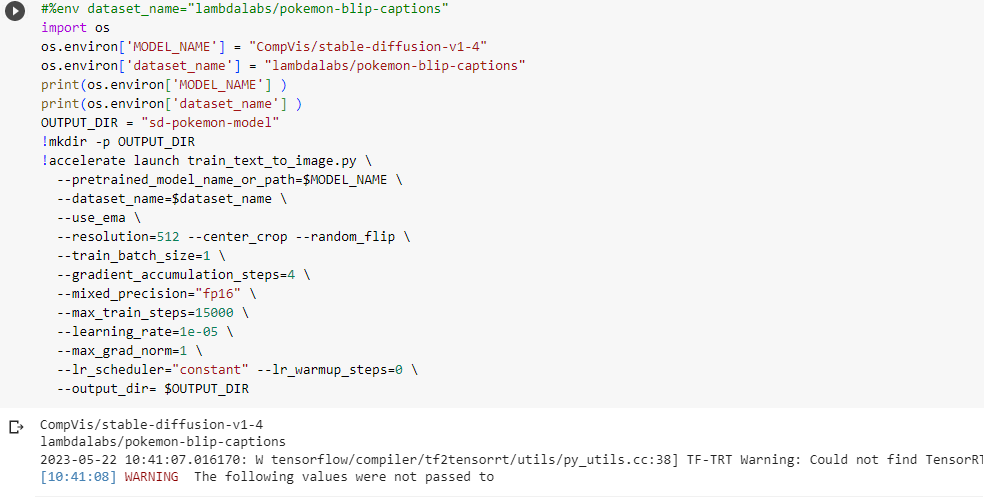

https://github.com/huggingface/accelerate/issues/1464

In [25]:
import os

os.environ['MODEL_NAME'] = 'runwayml/stable-diffusion-v1-5'
os.environ['dataset_name'] = 'lambdalabs/pokemon-blip-captions'

OUTPUT_DIR = 'sd-pokemon-model'

In [27]:
!accelerate launch train_text_to_image.py \
    --pretrained_model_name_or_path=$MODEL_NAME \
    --dataset_name=$dataset_name \
    --use_ema \
    --resolution=512 --center_crop --random_flip \
    --train_batch_size=1 \
    --gradient_accumulation_steps=1 \
    --mixed_precision="fp16" \
    --max_train_steps=100 \
    --learning_rate=1e-05 \
    --max_grad_norm=1 \
    --lr_scheduler="constant" --lr_warmup_steps=0 \
    --gradient_checkpointing \
    --output_dir=OUTPUT_DIR

# --enable_xformers_memory_efficient_attention \

# accelerate 스크립트에서도 V100 16GB에서 OOM
# 여기서도 여전이 T4는 sm_80, sm_90 에러남

# 패키지를 최신으로 업데이트하고 pytroch 2.0버전을 설치하면
# T4에서 아무런 에러가 없이 진행됨
# 하지만 gradient_accumulation_steps=2에서 OOM
# gradient_accumulation_steps=1에서도 OOM

2024-02-22 14:02:17.587791: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 14:02:17.587845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 14:02:17.589229: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 14:02:19.534636: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
02/22/2024 14:02:20 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'variance_type', 'timestep_spacing', 'thresholding', 'prediction_type', '